[*********************100%***********************]  1 of 1 completed


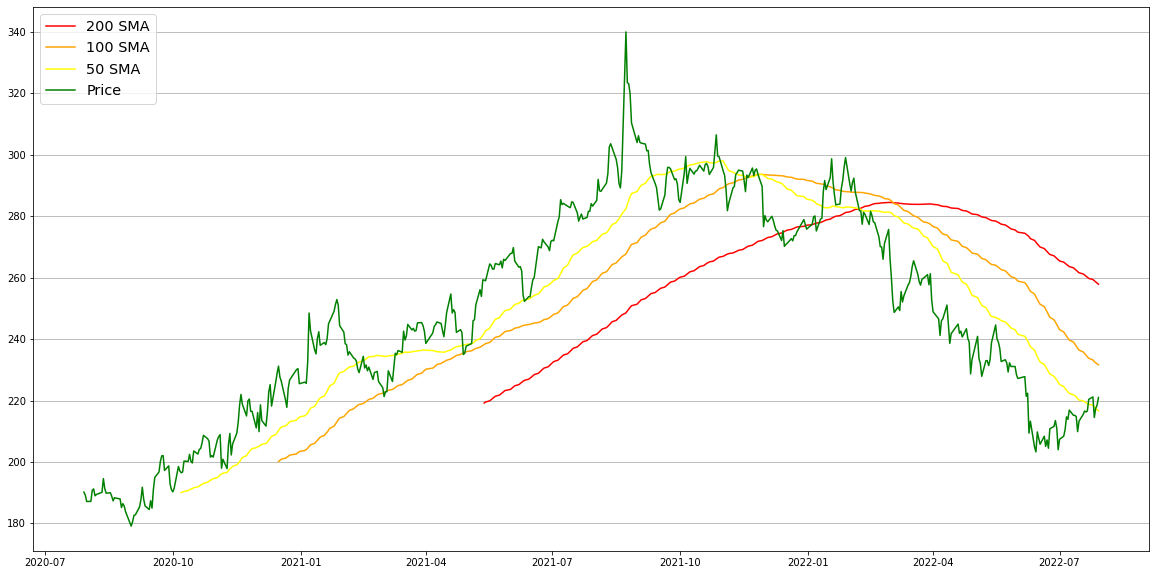

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#####
# SMA STACK
#####
share = yf.download(tickers='SBRY.L', period='2Y')
share = share.drop(['Volume', 'Adj Close'], axis=1)
share["50SMA"]=share[["Close"]].rolling(50).mean()
share["100SMA"]=share[["Close"]].rolling(100).mean()
share["200SMA"]=share[["Close"]].rolling(200).mean()

plt.figure(figsize=(20,10))
plt.plot(share["200SMA"],label="200 SMA", color = 'red')
plt.plot(share["100SMA"],label="100 SMA", color = 'orange')
plt.plot(share["50SMA"],label="50 SMA", color = 'yellow')
plt.plot(share["Close"],label="Price", color = 'green')
plt.grid(axis = 'y')
plt.legend(loc='upper left',fontsize="x-large")

[*********************100%***********************]  1 of 1 completed


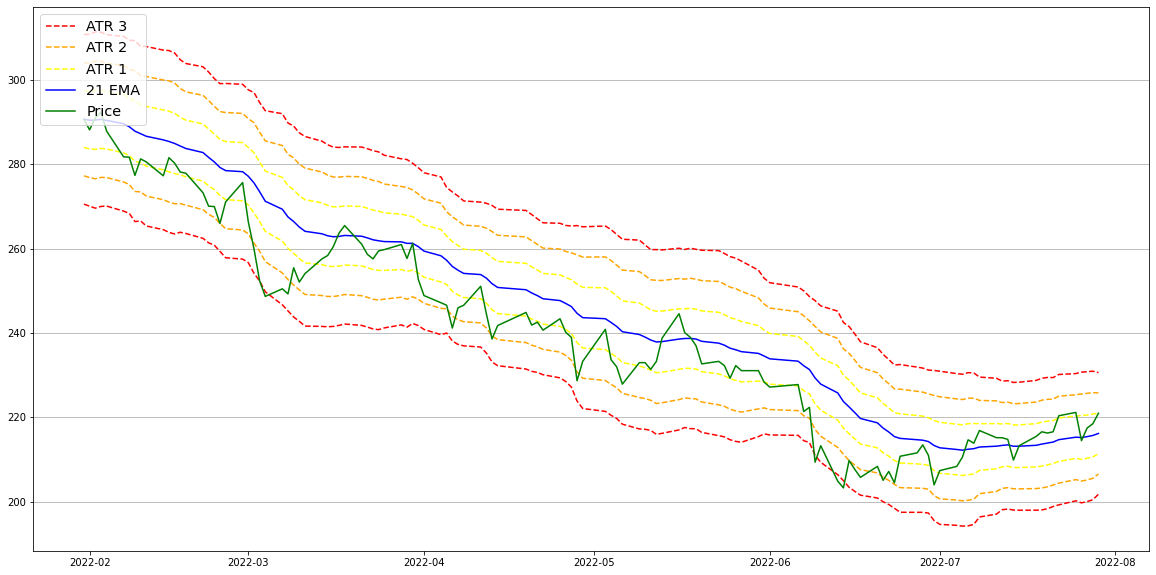

In [34]:
#####
# EMA STACK
#####
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

share = yf.download(tickers='SBRY.L', period='1Y')
share = share.drop(['Volume', 'Adj Close'], axis=1)
share["8EMA"] = share[["Close"]].ewm(span=8, adjust=False).mean()
share["21EMA"] = share[["Close"]].ewm(span=21, adjust=False).mean()
share["34EMA"] = share[["Close"]].ewm(span=34, adjust=False).mean()
share["55EMA"] = share[["Close"]].ewm(span=55, adjust=False).mean()
share["89EMA"] = share[["Close"]].ewm(span=89, adjust=False).mean()

plt.figure(figsize=(20,10))
plt.plot(share["8EMA"], linestyle = 'dashed', label="8 EMA", color="Red")
plt.plot(share["21EMA"], linestyle = 'dashed', label="21 EMA", color="Orange")
plt.plot(share["34EMA"], linestyle = 'dashed', label="34 EMA", color="Yellow")
plt.plot(share["55EMA"], linestyle = 'dashed', label="55 EMA", color="Blue")
plt.plot(share["89EMA"], linestyle = 'dashed', label="89 EMA", color="Indigo")
plt.plot(share["Close"], label="Price", color="Green")
plt.grid(axis = 'y')
plt.legend(loc='upper left',fontsize="x-large")

[*********************100%***********************]  1 of 1 completed


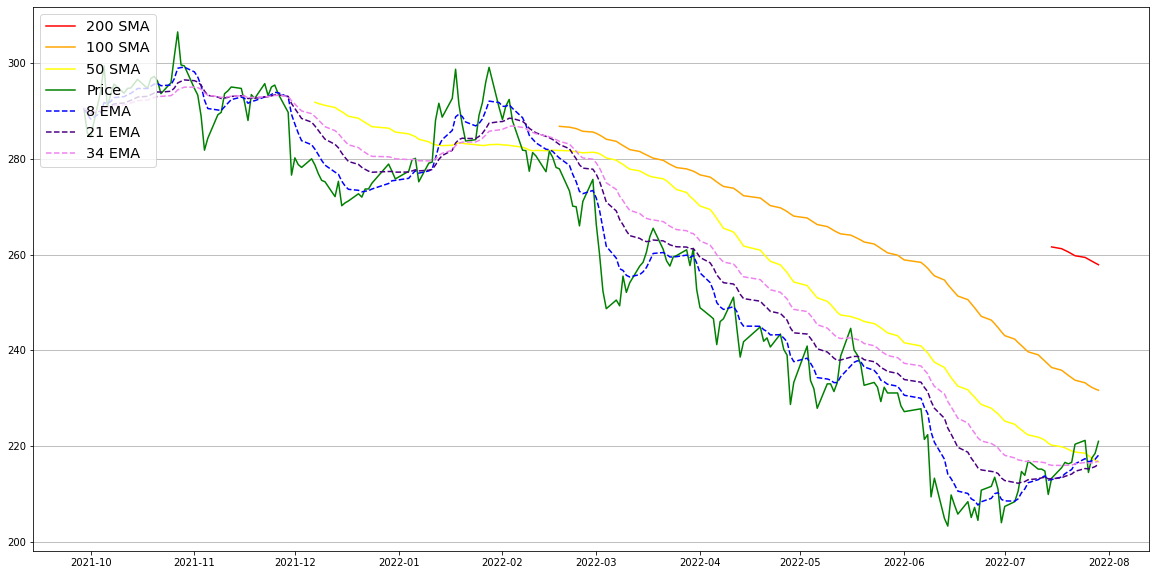

In [2]:
#####
# SUPPORT/RESISTANCE LEVELS
#####
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

share = yf.download(tickers='SBRY.L', period='1Y')
share["50SMA"]=share[["Close"]].rolling(50).mean()
share["100SMA"]=share[["Close"]].rolling(100).mean()
share["200SMA"]=share[["Close"]].rolling(200).mean()
share = share.drop(['Volume', 'Adj Close'], axis=1)
share["8EMA"] = share[["Close"]].ewm(span=8, adjust=False).mean()
share["21EMA"] = share[["Close"]].ewm(span=21, adjust=False).mean()
share["34EMA"] = share[["Close"]].ewm(span=34, adjust=False).mean()

plt.figure(figsize=(20,10))
plt.plot(share["200SMA"],label="200 SMA", color = 'red')
plt.plot(share["100SMA"],label="100 SMA", color = 'orange')
plt.plot(share["50SMA"],label="50 SMA", color = 'yellow')
plt.plot(share["Close"],label="Price", color = 'green')
plt.plot(share["8EMA"],label="8 EMA", linestyle = 'dashed', color = 'blue')
plt.plot(share["21EMA"],label="21 EMA", linestyle = 'dashed', color = 'indigo')
plt.plot(share["34EMA"],label="34 EMA", linestyle = 'dashed', color = 'violet')
plt.grid(axis = 'y')
plt.legend(loc='upper left',fontsize="x-large")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


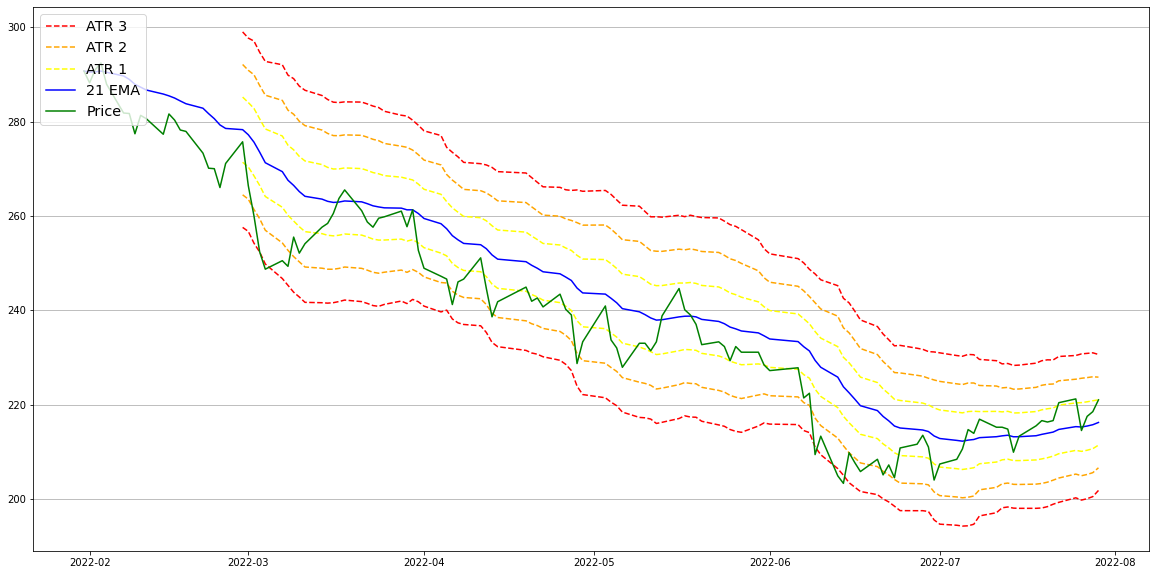

In [9]:
#####
# 21 DAY EMA /W ATR RANGE OF 1-3
#####
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

share = yf.download(tickers='SBRY.L', period='6mo')
share = share.drop(['Volume', 'Adj Close'], axis=1)

share["21EMA"] = share[["Close"]].ewm(span=21, adjust=False).mean()

# START: CLEAN THIS UP
data = yf.download(tickers='SBRY.L', period='6mo')
high_low = data['High'] - data['Low']
high_close = np.abs(data['High'] - data['Close'].shift())
low_close = np.abs(data['Low'] - data['Close'].shift())
ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)
atr = true_range.rolling(21).sum()/21
share["ATR"] = atr
share["ATR +1"] = share["21EMA"] + (share["ATR"] * 1)
share["ATR +2"] = share["21EMA"] + (share["ATR"] * 2)
share["ATR +3"] = share["21EMA"] + (share["ATR"] * 3)
share["ATR -1"] = share["21EMA"] + (share["ATR"] * -1)
share["ATR -2"] = share["21EMA"] + (share["ATR"] * -2)
share["ATR -3"] = share["21EMA"] + (share["ATR"] * -3)
# END: CLEAN THIS UP

plt.figure(figsize=(20,10))
plt.plot(share["ATR +3"], linestyle = 'dashed', label="ATR 3", color="Red")
plt.plot(share["ATR -3"], linestyle = 'dashed', color="Red")
plt.plot(share["ATR +2"], linestyle = 'dashed', label="ATR 2", color="Orange")
plt.plot(share["ATR -2"], linestyle = 'dashed', color="Orange")
plt.plot(share["ATR +1"], linestyle = 'dashed', label="ATR 1", color="Yellow")
plt.plot(share["ATR -1"], linestyle = 'dashed', color="Yellow")
plt.plot(share["21EMA"], label="21 EMA", color="Blue")
plt.plot(share["Close"], label="Price", color="Green")
plt.grid(axis = 'y')
plt.legend(loc='upper left',fontsize="x-large")

#https://www.tradingview.com/support/solutions/43000502266-keltner-channels-kc/